In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time

In [2]:
#Considers spatial characteristics
#24/02/21
#25/02/21

In [6]:
def AgeComorbidParms(i, j):
    #straitfy into age bands
    #j = 0, no comorbidities
    #j =/ 0, comorbidity states, currently coalesced into 1 large comorbidity state describing all comorbidities
    
    #currently set to arbitrary values loosely reflecting social contact patterns and health conditions
    
    #Modifying factors for parameters for testing purposes
    M = 10
    G = 10
    D = 1
    #i = 0 : 0-17
    if i == 0:
        if j == 0:
           beta = 0.032*M
           gamma = 0.020*G
           mu = 0.00001*D
        if j == 1:
           beta = 0.032*M
           gamma = 0.019*G
           mu = 0.00005*D
    # i = 1 : 18-29
    if i == 1:
        if j == 0:
           beta = 0.034*M
           gamma = 0.021*G
           mu = 0.00002*D
        if j == 1:
           beta = 0.034*M
           gamma = 0.020*G
           mu = 0.00007*D
    # i = 2 : 30-39
    if i == 2:
        if j == 0:
           beta = 0.035*M
           gamma = 0.019*G
           mu = 0.00003*D
        if j == 1:
           beta = 0.034*M
           gamma = 0.019*G
           mu = 0.00008*D
    # i = 3 : 40-49
    if i == 3:
        if j == 0:
           beta = 0.032*M
           gamma = 0.017*G
           mu = 0.0001*D
        if j == 1:
           beta = 0.030*M
           gamma = 0.016*G
           mu = 0.00025*D 
    # i = 4 : 50-59
    if i == 4:
        if j == 0:
           beta = 0.03*M
           gamma = 0.016*G
           mu = 0.00015*D
        if j == 1:
           beta = 0.028*M
           gamma = 0.014*G
           mu = 0.00013*D    
    # i = 5 : 60-69
    if i == 5:
        if j == 0:
           beta = 0.028*M
           gamma = 0.013*G
           mu = 0.0002*D
        if j == 1:
           beta = 0.026*M
           gamma = 0.011*G
           mu = 0.0003*D  
    # i = 6 : 70-79
    if i == 6: 
        if j == 0:
           beta = 0.025*M
           gamma = 0.010*G
           mu = 0.00025*D
        if j == 1:
           beta = 0.024*M
           gamma = 0.0095*G
           mu = 0.0004*D   
    # i = 7 : 80-89
    if i == 7: 
        if j == 0:
           beta = 0.023*M
           gamma = 0.0075*G
           mu = 0.0005*D
        if j == 1:
           beta = 0.020*M
           gamma = 0.006*G
           mu = 0.002*D    
    # i = 8 : 90+
    if i == 8:
        if j == 0:
           beta = 0.020*M
           gamma = 0.006*G
           mu = 0.001*D
        if j == 1:
           beta = 0.016*M
           gamma = 0.003*G
           mu = 0.005*D
    return beta, gamma, mu

In [7]:
"""
Function to give model parameters for different areas in space (bubbles)
24/02/21
"""

def bubble(b):
    if b == 0: #London
        N = 8961989
        demographic_healthy = [2019642,1486173,1545339,1153667,936215,605980,374751,147692,24476]
        demographic_comorbid = [12785,31040,74290,103979,126270,98020,92105,96585,32980]
        infected_healthy = [0,0,0,5,0,0,0,0,0]
        infected_comorbid = [0,0,0,0,0,0,0,0,0]
    if b == 1: #Birmingham
        N = 1141816
        demographic_healthy = [286373,234496,148716,118743,109073,77894,52376,23193,3152]
        demographic_comorbid = [1020,4475,10210,14940,15885,12080,11390,12845,4955]
        infected_healthy = [0,0,0,0,0,0,0,0,0]
        infected_comorbid = [0,0,0,0,0,0,0,0,0]
    if b == 2: #Leeds
        N = 793139
        demographic_healthy = [168922,167322,101966,86366,85161,62784,45044,18809,1950]
        demographic_comorbid = [500,2420,4925,6445,8120,8375,10605,9910,3515]
        infected_healthy = [0,0,0,0,0,0,0,0,0]
        infected_comorbid = [0,0,0,0,0,0,0,0,0]
    
    if b == 3: #Sheffield
        N = 584853
        demographic_healthy = [117416,130095,71113,62880,64299,46603,35758,15325,1969]
        demographic_comorbid = [320,2150,3675,4565,5970,5755,7090,7155,2715]
        infected_healthy = [0,0,0,0,0,0,0,0,0]
        infected_comorbid = [0,0,0,0,0,0,0,0,0]
    if b == 4: #Manchester
        N = 552858
        demographic_healthy = [122019,149947,89258,53482,45452,29458,17062,6150,955]
        demographic_comorbid = [895,2155,4305,6500,7675,6090,5200,4745,1510]
        infected_healthy = [0,0,0,0,0,0,0,0,0]
        infected_comorbid = [0,0,0,0,0,0,0,0,0]
    if b == 5: #Bradford
        N = 539776
        demographic_healthy = [142225,77192,69112,61961,58486,44616,28111,11761,1482]
        demographic_comorbid = [355,2385,5310,7085,6975,6945,6925,6545,2305]
        infected_healthy = [0,0,0,0,0,0,0,0,0]
        infected_comorbid = [0,0,0,0,0,0,0,0,0]
    
    if b == 6: #Liverpool
        N = 498042
        demographic_healthy = [95297,113438,69657,49978,50940,36635,20730,8633,1234]
        demographic_comorbid = [755,2095,3655,4780,8315,10755,11100,8125,1920]
        infected_healthy = [0,0,0,0,0,0,0,0,0]
        infected_comorbid = [0,0,0,0,0,0,0,0,0]
    if b == 7: #Bristol
        N = 463377
        demographic_healthy = [93851,114243,72509,48161,42930,31455,22051,9355,1782]
        demographic_comorbid = [285,1350,2790,3665,4285,4055,4235,4520,1855]
        infected_healthy = [0,0,0,0,0,0,0,0,0]
        infected_comorbid = [0,0,0,0,0,0,0,0,0]
    
    return N, demographic_healthy, demographic_comorbid, infected_healthy, infected_comorbid    

In [21]:
"""
Determines if 'lockdown' occuring, reduces beta within model
"""

def Lockdown(p):
    Lockdown1start = 0
    Lockdown1end = 0
    Lockdown2start = 0
    Lockdown2end = 0
    Lockdown3start = 0 
    Lockdown3end = 0
    
    if Lockdown1start <= p <= Lockdown1end:
        
        L = 1
        
    elif Lockdown2start <= p <= Lockdown2end: 
        
        L = 1
        
    else:
        L = 0
        

    return L    

In [47]:
"""
Deterministic variant
Refer to https://www.aimath.org/WWN/populationmodel/chapmar25.pdf for theoretical basis
11/12/20
Not fully updated after decision to focus on stochastic model
"""
def SIRDet(incubation, dt, time, vac_start, vac_eff):
    #all given rates per day, dt as fraction of day, e.g. dt=1 is 1 day
    #beta = average number of infective contacts per person per day
    #gamma = recovery rate per day
    #mu = death rate per day
    t = np.arange(0,time,dt)
    n = len(t)
    alpha = 1/incubation

    
    #4D initialised arrays for data, dimensions correspond to time, age band, comorbidity, bubble(city) respectively
   
    S = np.zeros((n,9,2,8)) #susceptible
    E = np.zeros((n,9,2,8)) #exposed 
    I = np.zeros((n,9,2,8)) #infected
    R = np.zeros((n,9,2,8)) #recovered
    D = np.zeros((n,9,2,8)) #dead
    T = np.zeros((n,9,2,8)) #total cases, includes infected, recovered and dead
    Q = np.zeros((n,9,2,8)) #quarantined, not currently in use
    H = np.zeros((n,9,2,8)) #hospitalised, not currently in use
    V = np.zeros((n,9,2,8)) #vaccination
    V_s = np.zeros((n,9,2,8)) #vaccinated gained immunity
    V_f = np.zeros((n,9,2,8)) #vaccinated not gained immunity
    V_c = np.zeros((n,9,2,8)) #cumulative vaccine
    
    #New 1D arrays to hold sum of population across strata, aka total population at each timestep
    #Implemented in attempt to fix bug in data presentation
    S_t = np.zeros(n) #susceptible
    E_t = np.zeros(n) #exposed
    I_t = np.zeros(n) #infected
    R_t = np.zeros(n) #recovered
    D_t = np.zeros(n) #dead
    T_t = np.zeros(n) #total cases, includes infected, recovered and dead
    Q_t = np.zeros(n) #quarantined, not currently in use
    H_t = np.zeros(n) #hospitalised, not currently in use
    V_t = np.zeros(n) #vaccination
    V_s_t = np.zeros(n) #vaccinated gained immunity
    V_f_t = np.zeros(n) #vaccinated not gained immunity
    V_c_t = np.zeros(n) #cumulative vaccine
    
    for p in range(1,n):
        
        if p >= (vac_start/dt):
            vac_rate = 0.25
        else:
            vac_rate = 0
    
    
        for b in range (0,8):
            for i in range(0,9):
                for j in range (0,2):
                    
                    N = bubble(b)[0]
                    
                    #chooses initial population for each stratified group from arrays above
                    if j == 0:
                        N_ini = bubble(b)[1][i]
                        I_ini = bubble(b)[3][i]
                    if j == 1:
                        N_ini = bubble(b)[2][i]
                        I_ini = bubble(b)[4][i]

                    #initialises populations for 3D arrays
                    S[0,i,j,b] = N_ini - I_ini
                    I[0,i,j,b] = I_ini
                    T[0,i,j,b] = I[0,i,j,b]
                    #initialises populations for 1D arrays
                    S_t[0] = np.sum(S[0,])
                    I_t[0] = np.sum(I[0,])
                    T_t[0] = np.sum(T[0,])

                    #Sets parameters
                    beta = AgeComorbidParms(i,j)[0]
                    gamma = AgeComorbidParms(i,j)[1]
                    mu = AgeComorbidParms(i,j)[2]






                    S[p,i,j,b] = (-beta*S[p-1,i,j,b]*(np.sum(I[p-1,:,:,b])+np.sum(E[p-1,:,:,b]))/N - \
                    vac_rate*S[p-1,i,j,b])*dt + S[p-1,i,j,b] 
                    E[p,i,j,b] = (beta*S[p-1,i,j,b]*(np.sum(I[p-1,:,:,b])+np.sum(E[p-1,:,:,b]))/N + \
                    beta*V_f[p-1,i,j,b]*(np.sum(I[p-1,:,:,b]) +np.sum(E[p-1,:,:,b]))/N - alpha*E[p-1,i,j,b])*dt + E[p-1,i,j,b]
                    I[p,i,j,b] = (alpha*E[p-1,i,j,b] - gamma*I[p-1,i,j,b] - mu*I[p-1,i,j,b])*dt + I[p-1,i,j,b]
                    R[p,i,j,b] = (gamma*I[p-1,i,j,b])*dt + R[p-1,i,j,b]
                    D[p,i,j,b] = (mu*I[p-1,i,j,b])*dt + D[p-1,i,j,b]
                    V_s[p,i,j,b] = ((vac_eff/100)*vac_rate*S[p-1,i,j,b])*dt + V_s[p-1,i,j,b]
                    V_f[p,i,j,b] = ((1-vac_eff/100)*vac_rate*S[p-1,i,j,b] - beta*V_f[p-1,i,j,b]*(np.sum(I[p-1,:,:,b])\
                    +np.sum(E[p-1,:,:,b])/N))*dt + V_f[p-1,i,j,b]
                    V_c[p,i,j,b] = (vac_rate*S[p-1,i,j,b])*dt + V_c[p-1,i,j,b]
                    T[p,i,j,b] = I[p,i,j,b] + R[p,i,j,b] + D[p,i,j,b]

            S_t[p] = np.sum(S[p,])
            E_t[p] = np.sum(E[p,])
            I_t[p] = np.sum(I[p,])
            R_t[p] = np.sum(R[p,])
            D_t[p] = np.sum(D[p,])
            V_s_t[p] = np.sum(V_s[p,])
            V_f_t[p] = np.sum(V_f[p,])
            V_c_t[p] = np.sum(V_c[p,])
            T_t[p] = np.sum(T[p,])
    return{'t':t,'S':S_t,'E':E_t, 'I':I_t, 'R':R_t, 'D':D_t,\
           'Vaccinated':V_s_t, 'Cumulative Vaccinated': V_c_t,  'Total Cases':T_t}


"""
Stochastic variant
Refer to https://www.aimath.org/WWN/populationmodel/chapmar25.pdf for theoretical basis
11/12/20
Add multinomial distribution for infected compartment
"""


def SIRSto(incubation, dt, time, vac_start, vac_eff):
    #all given rates per day, dt as fraction of day, e.g. dt=1 is 1 day
    #beta = average number of infective contacts per person per day
    #gamma = recovery rate per day
    #mu = death rate per day
    t = np.arange(0,time,dt)
    n = len(t)
    alpha = 1/incubation
    
    
    #4D initialised arrays for data, dimensions correspond to time, age band, comorbidity, bubble(city) respectively
   
    S = np.zeros((n,9,2,8)) #susceptible
    E = np.zeros((n,9,2,8)) #exposed 
    I = np.zeros((n,9,2,8)) #infected
    R = np.zeros((n,9,2,8)) #recovered
    D = np.zeros((n,9,2,8)) #dead
    T = np.zeros((n,9,2,8)) #total cases, includes infected, recovered and dead
    Q = np.zeros((n,9,2,8)) #quarantined, not currently in use
    H = np.zeros((n,9,2,8)) #hospitalised, not currently in use
    V = np.zeros((n,9,2,8)) #vaccination
    V_c = np.zeros((n,9,2,8)) #cumulative vaccine
    
    #New 1D arrays to hold sum of population across strata, aka total population at each timestep
    #Implemented in attempt to fix bug in data presentation
    S_t = np.zeros(n) #susceptible
    E_t = np.zeros(n) #exposed
    I_t = np.zeros(n) #infected
    R_t = np.zeros(n) #recovered
    D_t = np.zeros(n) #dead
    T_t = np.zeros(n) #total cases, includes infected, recovered and dead
    Q_t = np.zeros(n) #quarantined, not currently in use
    H_t = np.zeros(n) #hospitalised, not currently in use
    V_t = np.zeros(n) #vaccination
    V_c_t = np.zeros(n) #cumulative vaccinated
    
    
    MoveS = np.zeros((n,9,2,8,8))
    MoveE = np.zeros((n,9,2,8,8))
    MoveI = np.zeros((n,9,2,8,8))
    MoveV = np.zeros((n,9,2,8,8))
    
   
    
    
    for p in range(1,n):
        
        L = Lockdown(p)
        
        
        
        if p >= (vac_start/dt):
            vac_rate = 0.04
        else:
            vac_rate = 0
        
        for b in range (0,8):    
            for i in range(0,9):
                for j in range (0,2):
                    
                    N = bubble(b)[0]
                    
                    #chooses initial population for each stratified group from arrays above
                    if j == 0:
                        N_ini = bubble(b)[1][i]
                        I_ini = bubble(b)[3][i]
                    if j == 1:
                        N_ini = bubble(b)[2][i]
                        I_ini = bubble(b)[4][i]

                    #initialises populations for 4D arrays
                    S[0,i,j,b] = N_ini - I_ini
                    I[0,i,j,b] = I_ini
                    T[0,i,j,b] = I[0,i,j,b]
                    #initialises populations for 1D arrays
                    S_t[0] = np.sum(S[0,])
                    I_t[0] = np.sum(I[0,])
                    T_t[0] = np.sum(T[0,])

                    #Sets parameters
                    
                    if L == 0:
                        beta = AgeComorbidParms(i,j)[0]
                    if L == 1:
                        beta = (AgeComorbidParms(i,j)[0])/10
                    
                    gamma = AgeComorbidParms(i,j)[1]
                    mu = AgeComorbidParms(i,j)[2]




                    leavingsus = np.random.multinomial(S[p-1,i,j,b],[1-np.exp((-beta*(np.sum(I[p-1,:,:,b])\
                    +np.sum(E[p-1,:,:,b]))/N)*dt), 1-np.exp(-vac_rate*dt),\
                    1-(1-np.exp((-beta*(np.sum(I[p-1,:,:,b])+np.sum(E[p-1,:,:,b]))/N)*dt)\
                    +1-np.exp(-vac_rate*dt))])
                    expnew = leavingsus[0]
                    vacnew = leavingsus[1]
                    infnew = np.random.binomial(E[p-1,i,j,b],1-np.exp(-alpha*dt))
                    leavinginf = np.random.multinomial(I[p-1,i,j,b], [1-np.exp(-gamma*dt), 1-np.exp(-mu*dt),\
                    1-(1-np.exp(-gamma*dt)+1-np.exp(-mu*dt))])
                    recnew = leavinginf[0]
                    deadnew = leavinginf[1]
                    vacexp = np.random.binomial(V[p-1,i,j,b],\
                    1-np.exp(-((1-(vac_eff/100))*beta*(np.sum(I[p-1,:,:,b])+np.sum(E[p-1,:,:,b]))/N)))
                    S[p,i,j,b] = S[p-1,i,j,b] - expnew - vacnew
                    E[p,i,j,b] = E[p-1,i,j,b] + expnew - infnew + vacexp
                    I[p,i,j,b] = I[p-1,i,j,b] + infnew - recnew - deadnew
                    R[p,i,j,b] = R[p-1,i,j,b] + recnew
                    D[p,i,j,b] = D[p-1,i,j,b] + deadnew
                    V[p,i,j,b] = V[p-1,i,j,b] + vacnew - vacexp
                    V_c[p,i,j,b] = V_c[p-1,i,j,b] + vacnew
                    T[p,i,j,b] = I[p,i,j,b] + R[p,i,j,b] + D[p,i,j,b]
        
        #Allows for migration between bubbles
        #Only moves those in groups who have role to play in infection
        #Have to determine everyone who is moving before moving them, otherwise potential for double movements in timestep
        
        for b in range (0,8): 
            P = [0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001]
            P[b] = 0.9993
            for i in range(0,9):
                for j in range (0,2):
                    
                    MigrateS = np.random.multinomial(S[p,i,j,b],P)
                    MigrateE = np.random.multinomial(E[p,i,j,b],P)
                    MigrateI = np.random.multinomial(I[p,i,j,b],P)
                    MigrateV = np.random.multinomial(V[p,i,j,b],P)
                    for B in range (0,8):
                        
                        MoveS[p,i,j,b,B] = MigrateS[B]
                        MoveE[p,i,j,b,B] = MigrateE[B]
                        MoveI[p,i,j,b,B] = MigrateI[B]
                        MoveV[p,i,j,b,B] = MigrateV[B]
                        
                        
                        
                    
        for b in range(0,8):    
            for i in range(0,9):
                for j in range (0,2):
                    
                    
                    S[p,i,j,b] = np.sum(MoveS[p,i,j,:,b])
                    E[p,i,j,b] = np.sum(MoveE[p,i,j,:,b])
                    I[p,i,j,b] = np.sum(MoveI[p,i,j,:,b])
                    V[p,i,j,b] = np.sum(MoveV[p,i,j,:,b])
                    
                    
        S_t[p] = np.sum(S[p,])
        E_t[p] = np.sum(E[p,])
        I_t[p] = np.sum(I[p,])
        R_t[p] = np.sum(R[p,])
        D_t[p] = np.sum(D[p,])
        V_t[p] = np.sum(V[p,])
        V_c_t[p] = np.sum(V_c[p,])
        T_t[p] = np.sum(T[p,])
    return{'t':t,'S':S_t,'E':E_t, 'I':I_t, 'R':R_t, 'D':D_t,\
           'Vaccinated':V_t, 'Cumulative Vaccinated': V_c_t,  'Total Cases':T_t}

In [54]:
sir_out = pd.DataFrame(SIRSto(5, 0.1, 391, 30, 90))


In [29]:
sir_out_det = pd.DataFrame(SIRDet(5, 0.1, 300, 301, 70))

In [55]:
pd.set_option('display.max_rows', None)
sir_out

,t,S,E,I,R,D,Vaccinated,Cumulative Vaccinated,Total Cases
0,0.0,13535845.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0
1,0.1,13535845.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0
2,0.2,13535844.0,1.0,5.0,0.0,0.0,0.0,0.0,5.0
3,0.3,13535844.0,1.0,5.0,0.0,0.0,0.0,0.0,5.0
4,0.4,13535844.0,1.0,5.0,0.0,0.0,0.0,0.0,5.0
5,0.5,13535844.0,1.0,5.0,0.0,0.0,0.0,0.0,5.0
6,0.6,13535844.0,1.0,5.0,0.0,0.0,0.0,0.0,5.0
7,0.7,13535844.0,1.0,5.0,0.0,0.0,0.0,0.0,5.0
8,0.8,13535844.0,1.0,5.0,0.0,0.0,0.0,0.0,5.0
9,0.9,13535844.0,1.0,4.0,1.0,0.0,0.0,0.0,5.0


In [30]:
pd.set_option('display.max_rows', None)
sir_out_det

,t,S,E,I,R,D,Vaccinated,Cumulative Vaccinated,Total Cases
0,0.0,99990.000000,0.000000,10.000000,0.000000,0.000000,0.0,0.0,10.000000
1,0.1,99989.832254,0.167746,9.829000,0.170000,0.001000,0.0,0.0,10.000000
2,0.2,99989.552933,0.443712,9.664279,0.337093,0.001983,0.0,0.0,10.003355
3,0.3,99989.270505,0.717266,9.507911,0.501367,0.002951,0.0,0.0,10.012229
4,0.4,99988.984803,0.988623,9.359714,0.662953,0.003907,0.0,0.0,10.026574
5,0.5,99988.695660,1.257993,9.219515,0.821978,0.004854,0.0,0.0,10.046347
6,0.6,99988.402909,1.525584,9.087147,0.978566,0.005794,0.0,0.0,10.071507
7,0.7,99988.106381,1.791600,8.962450,1.132839,0.006729,0.0,0.0,10.102018
8,0.8,99987.805906,2.056244,8.845273,1.284917,0.007661,0.0,0.0,10.137850
9,0.9,99987.501311,2.319714,8.735467,1.434915,0.008594,0.0,0.0,10.178975


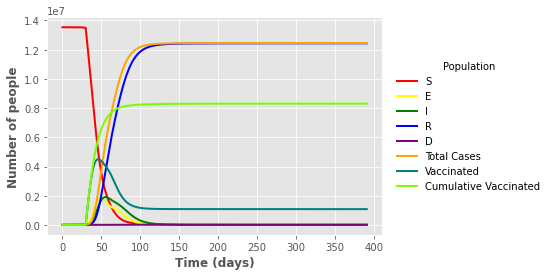

In [56]:
#stochastic
plt.style.use("ggplot")
sline = plt.plot("t","S","",data=sir_out,color="red",linewidth=2)
eline = plt.plot("t","E","",data=sir_out,color="yellow",linewidth=2)
iline = plt.plot("t","I","",data=sir_out,color="green",linewidth=2)
rline = plt.plot("t","R","",data=sir_out,color="blue",linewidth=2)
dline = plt.plot("t","D","",data=sir_out,color="purple",linewidth=2)
tline = plt.plot("t","Total Cases","",data=sir_out,color="orange",linewidth=2)
vline = plt.plot("t","Vaccinated","",data=sir_out,color="teal",linewidth=2)
vcline = plt.plot("t","Cumulative Vaccinated","",data=sir_out,color="lawngreen",linewidth=2)
plt.xlabel("Time (days)",fontweight="bold")
plt.ylabel("Number of people",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.50,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)

In [143]:
#deterministic
plt.style.use("ggplot")
sline = plt.plot("t","S","",data=sir_out_det,color="red",linewidth=2)
eline = plt.plot("t","E","",data=sir_out_det,color="yellow",linewidth=2)
iline = plt.plot("t","I","",data=sir_out_det,color="green",linewidth=2)
rline = plt.plot("t","R","",data=sir_out_det,color="blue",linewidth=2)
dline = plt.plot("t","D","",data=sir_out_det,color="purple",linewidth=2)
tline = plt.plot("t","Total Cases","",data=sir_out_det,color="orange",linewidth=2)
vline = plt.plot("t","Vaccinated","",data=sir_out_det,color="teal",linewidth=2)
vcline = plt.plot("t","Cumulative Vaccinated","",data=sir_out_det,color="lawngreen",linewidth=2)

plt.xlabel("Time (days)",fontweight="bold")
plt.ylabel("Number of people",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.50,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)

NameError: name 'sir_out_det' is not defined

In [4]:
df = pd.read_csv (r'C:\Users\Michael\Desktop\Project Notebook\City Data\Combined2.csv')

Data = df[::-1]

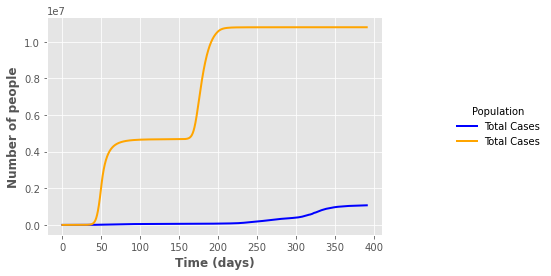

In [19]:
plt.style.use("ggplot")
caseline = plt.plot("Day","Total Cases","",data=Data,color="blue",linewidth=2)
tline = plt.plot("t","Total Cases","",data=sir_out,color="orange",linewidth=2)



plt.xlabel("Time (days)",fontweight="bold")
plt.ylabel("Number of people",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.50,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)

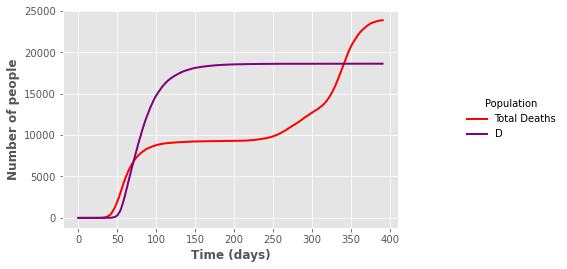

In [25]:
plt.style.use("ggplot")
deadline = plt.plot("Day","Total Deaths","",data=Data,color="red",linewidth=2)
dline = plt.plot("t","D","",data=sir_out,color="purple",linewidth=2)



plt.xlabel("Time (days)",fontweight="bold")
plt.ylabel("Number of people",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.50,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)

11441.69538283348


NameError: name 'sir_out_det' is not defined

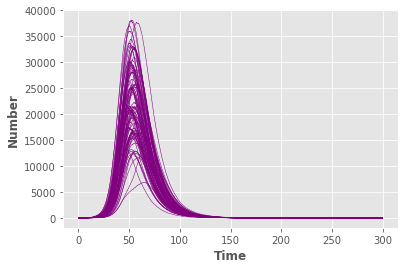

In [12]:
tic = time.time()
for i in range(0,100):
    sir_out = pd.DataFrame(SIRSto(5, 0.1, 300, 301, 70))
    plt.style.use("ggplot")
    line = plt.plot("t","I","",data=sir_out,color="purple",linewidth=0.5)
    plt.xlabel("Time",fontweight="bold")
    plt.ylabel("Number",fontweight="bold")
toc = time.time()
print(toc-tic)

linedet = plt.plot("t","I","",data=sir_out_det,color="black",linewidth=2)

In [19]:
# finds actual effectiveness of vaccine over 100 stochastic trials
#filters out effectivenesses of 100% as these occur when no outbreak has happened mathematically
#potentially skewed by very minor outbreaks meaning less vaccinated people come into contact with infected people
Actual_eff = []
for i in range(0,100):
    sir_out = pd.DataFrame(SIRSto(5, 100000, 0.1, 1, 300, 50, 82))
    v_max = (np.max(sir_out["Cumulative Vaccinated"]))
    v_fin = sir_out["Vaccinated"].iloc[-1]
    Actual_eff.append((v_fin/v_max)*100)
    
    
F_Actual_eff = []
for i in range(0, len(Actual_eff)):
    if Actual_eff[i] != 100.0:
        F_Actual_eff.append(Actual_eff[i])

np.average(F_Actual_eff)

81.87789763191864

In [ ]:
#finds actual effectiveness of vaccine in deterministic model
sir_out_det = pd.DataFrame(SIRDet(5, 100000, 0.1, 1, 300, 50, 70))
v_max = (np.max(sir_out_det["V_c"]))
v_fin = sir_out_det["V"].iloc[-1]
print((v_fin/v_max)*100)

In [ ]:
#Everything beyond this point for simple testing purposes only or deleted stuff previously part of the model

In [8]:
g = np.zeros((3,3,2,2))
T = np.zeros(3)
g[0,0,1,1] = 3
g[1,2,1,1] = 6
g[1,0,1,0] = 2
g[1,0,0,0] = 5
print(g)
print(g[1,])

np.sum(g[:,2,1])
np.sum(g[1,])
T[0] = np.sum(g[0,])
T[1] = np.sum(g[1,:,1,:])
T[2] = np.sum(g[2,])

print(T)

[[[[0. 0.]
   [0. 3.]]

  [[0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]]]


 [[[5. 0.]
   [2. 0.]]

  [[0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 6.]]]


 [[[0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]]]]
[[[5. 0.]
  [2. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 6.]]]
[3. 8. 0.]


In [42]:
P = [0,0,0,0,0,0,0,0,0,0]
print(P[1])
P[1] = 1
print(P)
S = np.random.multinomial(5,P)
print(S)

0
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0 5 0 0 0 0 0 0 0 0]


In [ ]:
#copy and paste transition probabilities between bubbles
P = [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01]
P[b] = 0.91
[0,0,0,0,0,0,0,0,0,0]
P[b] = 1
P = [0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001]
P[b] = 0.991

#c and p bubble populations
N = 100000
demographic_healthy = [N/18, N/18, N/18, N/18, N/18, N/18, N/18, N/18, N/18]
demographic_comorbid = [N/18, N/18, N/18, N/18, N/18, N/18, N/18, N/18, N/18]
infected_healthy = [0,0,0,1,0,0,0,0,0]
infected_comorbid = [0,0,0,0,0,0,0,0,0]

N = 18000
demographic_healthy = [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
demographic_comorbid = [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
infected_healthy = [0,0,0,1,0,0,0,0,0]
infected_comorbid = [0,0,0,0,0,0,0,0,0]
 

In [ ]:
#saved parameters
    if i == 0:
        if j == 0:
           beta = 0.032*3
           gamma = 0.020*3
           mu = 0.00001
        if j == 1:
           beta = 0.032*3
           gamma = 0.019*3
           mu = 0.00005
    # i = 1 : 11-20
    if i == 1:
        if j == 0:
           beta = 0.034*3
           gamma = 0.021*3
           mu = 0.00002
        if j == 1:
           beta = 0.034*3
           gamma = 0.020*3
           mu = 0.00007
    # i = 2 : 21-30
    if i == 2:
        if j == 0:
           beta = 0.035*3
           gamma = 0.019*3
           mu = 0.00003
        if j == 1:
           beta = 0.034*3
           gamma = 0.019*3
           mu = 0.00008
    # i = 3 : 31-40
    if i == 3:
        if j == 0:
           beta = 0.032*3
           gamma = 0.017*3
           mu = 0.0001
        if j == 1:
           beta = 0.030*3
           gamma = 0.016*3
           mu = 0.00025 
    # i = 4 : 41-50
    if i == 4:
        if j == 0:
           beta = 0.03*3
           gamma = 0.016*3
           mu = 0.00015
        if j == 1:
           beta = 0.028*3
           gamma = 0.014*3
           mu = 0.00013    
    # i = 5 : 51-60
    if i == 5:
        if j == 0:
           beta = 0.028*3
           gamma = 0.013*3
           mu = 0.0002
        if j == 1:
           beta = 0.026*3
           gamma = 0.011*3
           mu = 0.0003  
    # i = 6 : 61-70
    if i == 6: 
        if j == 0:
           beta = 0.025*3
           gamma = 0.010*3
           mu = 0.00025
        if j == 1:
           beta = 0.024*3
           gamma = 0.0095*3
           mu = 0.0004   
    # i = 7 : 71-80
    if i == 7: 
        if j == 0:
           beta = 0.023*3
           gamma = 0.0075*3
           mu = 0.0005
        if j == 1:
           beta = 0.020*3
           gamma = 0.006*3
           mu = 0.002    
    # i = 8 : 81+
    if i == 8:
        if j == 0:
           beta = 0.020*3
           gamma = 0.006*3
           mu = 0.001
        if j == 1:
           beta = 0.016*3
           gamma = 0.003*3
           mu = 0.005

In [ ]:
    if i == 0:
        if j == 0:
           beta = 0.32
           gamma = 0.20
           mu = 0.0001
        if j == 1:
           beta = 0.32
           gamma = 0.19
           mu = 0.0005
    # i = 1 : 11-20
    if i == 1:
        if j == 0:
           beta = 0.34
           gamma = 0.21
           mu = 0.0002
        if j == 1:
           beta = 0.34
           gamma = 0.20
           mu = 0.0007
    # i = 2 : 21-30
    if i == 2:
        if j == 0:
           beta = 0.35
           gamma = 0.19
           mu = 0.0003
        if j == 1:
           beta = 0.34
           gamma = 0.19
           mu = 0.0008
    # i = 3 : 31-40
    if i == 3:
        if j == 0:
           beta = 0.32
           gamma = 0.17
           mu = 0.001
        if j == 1:
           beta = 0.30
           gamma = 0.16
           mu = 0.0025 
    # i = 4 : 41-50
    if i == 4:
        if j == 0:
           beta = 0.3
           gamma = 0.16
           mu = 0.0015
        if j == 1:
           beta = 0.28
           gamma = 0.14
           mu = 0.0013    
    # i = 5 : 51-60
    if i == 5:
        if j == 0:
           beta = 0.28
           gamma = 0.13
           mu = 0.002
        if j == 1:
           beta = 0.26
           gamma = 0.11
           mu = 0.003  
    # i = 6 : 61-70
    if i == 6: 
        if j == 0:
           beta = 0.25
           gamma = 0.10
           mu = 0.0025
        if j == 1:
           beta = 0.24
           gamma = 0.095
           mu = 0.004   
    # i = 7 : 71-80
    if i == 7: 
        if j == 0:
           beta = 0.23
           gamma = 0.075
           mu = 0.005
        if j == 1:
           beta = 0.20
           gamma = 0.06
           mu = 0.02    
    # i = 8 : 81+
    if i == 8:
        if j == 0:
           beta = 0.20
           gamma = 0.06
           mu = 0.01
        if j == 1:
           beta = 0.16
           gamma = 0.03
           mu = 0.05

In [ ]:
    if i == 0:
        if j == 0:
           beta = 0.032
           gamma = 0.020
           mu = 0.00001
        if j == 1:
           beta = 0.032
           gamma = 0.019
           mu = 0.00005
    # i = 1 : 11-20
    if i == 1:
        if j == 0:
           beta = 0.034
           gamma = 0.021
           mu = 0.00002
        if j == 1:
           beta = 0.034
           gamma = 0.020
           mu = 0.00007
    # i = 2 : 21-30
    if i == 2:
        if j == 0:
           beta = 0.035
           gamma = 0.019
           mu = 0.00003
        if j == 1:
           beta = 0.034
           gamma = 0.019
           mu = 0.00008
    # i = 3 : 31-40
    if i == 3:
        if j == 0:
           beta = 0.032
           gamma = 0.017
           mu = 0.0001
        if j == 1:
           beta = 0.030
           gamma = 0.016
           mu = 0.00025 
    # i = 4 : 41-50
    if i == 4:
        if j == 0:
           beta = 0.03
           gamma = 0.016
           mu = 0.00015
        if j == 1:
           beta = 0.028
           gamma = 0.014
           mu = 0.00013
    # i = 5 : 51-60
    if i == 5:
        if j == 0:
           beta = 0.028
           gamma = 0.013
           mu = 0.0002
        if j == 1:
           beta = 0.026
           gamma = 0.011
           mu = 0.0003  
    # i = 6 : 61-70
    if i == 6: 
        if j == 0:
           beta = 0.025
           gamma = 0.010
           mu = 0.00025
        if j == 1:
           beta = 0.024
           gamma = 0.0095
           mu = 0.0004   
    # i = 7 : 71-80
    if i == 7: 
        if j == 0:
           beta = 0.023
           gamma = 0.0075
           mu = 0.0005
        if j == 1:
           beta = 0.020
           gamma = 0.006
           mu = 0.002    
    # i = 8 : 81+
    if i == 8:
        if j == 0:
           beta = 0.020
           gamma = 0.006
           mu = 0.001
        if j == 1:
           beta = 0.016
           gamma = 0.003
           mu = 0.005

In [ ]:
if i == 0:
        if j == 0:
           beta = 0.032*8
           gamma = 0.020*8
           mu = 0.00001
        if j == 1:
           beta = 0.032*8
           gamma = 0.019*8
           mu = 0.00005
    # i = 1 : 11-20
    if i == 1:
        if j == 0:
           beta = 0.034*8
           gamma = 0.021*8
           mu = 0.00002
        if j == 1:
           beta = 0.034*8
           gamma = 0.020*8
           mu = 0.00007
    # i = 2 : 21-30
    if i == 2:
        if j == 0:
           beta = 0.035*8
           gamma = 0.019*8
           mu = 0.00003
        if j == 1:
           beta = 0.034*8
           gamma = 0.019*8
           mu = 0.00008
    # i = 3 : 31-40
    if i == 3:
        if j == 0:
           beta = 0.032*8
           gamma = 0.017*8
           mu = 0.0001
        if j == 1:
           beta = 0.030*8
           gamma = 0.016*8
           mu = 0.00025 
    # i = 4 : 41-50
    if i == 4:
        if j == 0:
           beta = 0.03*8
           gamma = 0.016*8
           mu = 0.00015
        if j == 1:
           beta = 0.028*8
           gamma = 0.014*8
           mu = 0.00013    
    # i = 5 : 51-60
    if i == 5:
        if j == 0:
           beta = 0.028*8
           gamma = 0.013*8
           mu = 0.0002
        if j == 1:
           beta = 0.026*8
           gamma = 0.011*8
           mu = 0.0003  
    # i = 6 : 61-70
    if i == 6: 
        if j == 0:
           beta = 0.025*8
           gamma = 0.010*8
           mu = 0.00025
        if j == 1:
           beta = 0.024*8
           gamma = 0.0095*8
           mu = 0.0004   
    # i = 7 : 71-80
    if i == 7: 
        if j == 0:
           beta = 0.023*8
           gamma = 0.0075*8
           mu = 0.0005
        if j == 1:
           beta = 0.020*8
           gamma = 0.006*8
           mu = 0.002    
    # i = 8 : 81+
    if i == 8:
        if j == 0:
           beta = 0.020*8
           gamma = 0.006*8
           mu = 0.001
        if j == 1:
           beta = 0.016*8
           gamma = 0.003*8
           mu = 0.005

In [ ]:
#Deleted Scottish Cities
if b == 3: #Glasgow
        N = 633120
        demographic_healthy = [111093,135008,104561,68399,71537,49944,29066,12031,1579]
        demographic_comorbid = [505,2469,5642,6564,9069,8370,7686,7292,2305]
        infected_healthy = [0,0,0,1,0,0,0,0,0]
        infected_comorbid = [0,0,0,0,0,0,0,0,0]
        
if b == 7: #Edinburgh
        N = 524930
        demographic_healthy = [87085,109302,87174,60264,55584,41742,27115,11439,1706]
        demographic_comorbid = [396,1999,4704,5784,7047,6995,7170,6932,2492]
        infected_healthy = [0,0,0,1,0,0,0,0,0]
        infected_comorbid = [0,0,0,0,0,0,0,0,0]

In [30]:

n = np.arange(20,40,0.1)
print(n)

t = 20.9

for i in range(0, len(n)):
    if t == n[i]:
        print('True')
    else:
        print('False')

[20.  20.1 20.2 20.3 20.4 20.5 20.6 20.7 20.8 20.9 21.  21.1 21.2 21.3
 21.4 21.5 21.6 21.7 21.8 21.9 22.  22.1 22.2 22.3 22.4 22.5 22.6 22.7
 22.8 22.9 23.  23.1 23.2 23.3 23.4 23.5 23.6 23.7 23.8 23.9 24.  24.1
 24.2 24.3 24.4 24.5 24.6 24.7 24.8 24.9 25.  25.1 25.2 25.3 25.4 25.5
 25.6 25.7 25.8 25.9 26.  26.1 26.2 26.3 26.4 26.5 26.6 26.7 26.8 26.9
 27.  27.1 27.2 27.3 27.4 27.5 27.6 27.7 27.8 27.9 28.  28.1 28.2 28.3
 28.4 28.5 28.6 28.7 28.8 28.9 29.  29.1 29.2 29.3 29.4 29.5 29.6 29.7
 29.8 29.9 30.  30.1 30.2 30.3 30.4 30.5 30.6 30.7 30.8 30.9 31.  31.1
 31.2 31.3 31.4 31.5 31.6 31.7 31.8 31.9 32.  32.1 32.2 32.3 32.4 32.5
 32.6 32.7 32.8 32.9 33.  33.1 33.2 33.3 33.4 33.5 33.6 33.7 33.8 33.9
 34.  34.1 34.2 34.3 34.4 34.5 34.6 34.7 34.8 34.9 35.  35.1 35.2 35.3
 35.4 35.5 35.6 35.7 35.8 35.9 36.  36.1 36.2 36.3 36.4 36.5 36.6 36.7
 36.8 36.9 37.  37.1 37.2 37.3 37.4 37.5 37.6 37.7 37.8 37.9 38.  38.1
 38.2 38.3 38.4 38.5 38.6 38.7 38.8 38.9 39.  39.1 39.2 39.3 39.4 39.5
 39.6 